In [3]:
! pip install openpyxl matplotlib

  Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/109.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/109.0 kB ? eta -:--:--
     ------ ------------------------------ 20.5/109.0 kB 217.9 kB/s eta 0:00:01
     ---------- -------------------------- 30.7/109.0 kB 187.9 kB/s eta 0:00:01
     ------------- ----------------------- 41.0/109.0 kB 178.6 kB/s eta 0:00:01
     ------------- ----------------------- 41.0/109.0 kB 178.6 kB/s eta 0:00:01
     -------------------- ---------------- 61.4/109.0 kB 218.8 kB/s eta 0:00:01
     ------------------------------- ----- 92.2/109.0 kB 261.7 kB/s eta 0:00:01
     --------------------------------- -- 102.4/109.0 kB 256.7 kB/s eta 0:00:01
     ------------------------------------ 109.0/109.0 kB 252.7 kB/s eta 0:00:0


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Asus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


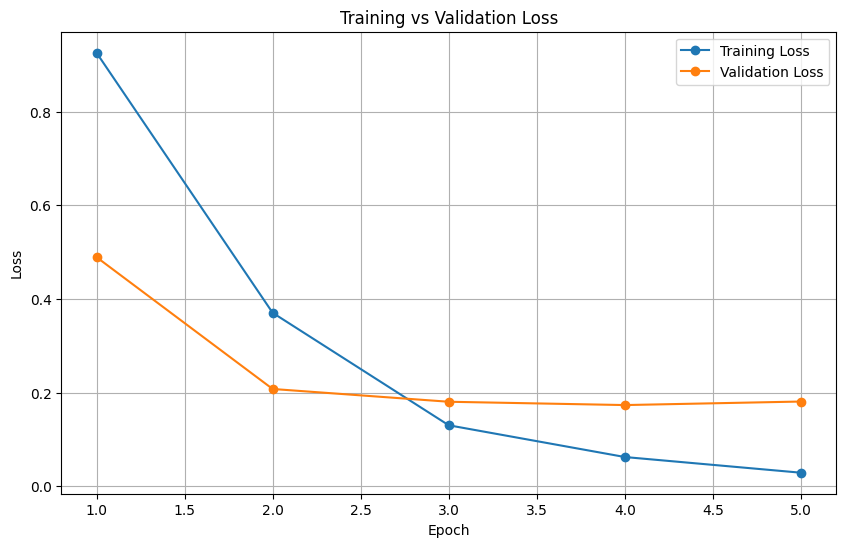

Epoch with minimum Validation Loss: 4
🟢 No clear overfitting detected.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
df = pd.read_csv("1.csv")

# Plot training vs validation loss
plt.figure(figsize=(10, 6))
plt.plot(df['Epoch'], df['Training Loss'], label='Training Loss', marker='o')
plt.plot(df['Epoch'], df['Validation Loss'], label='Validation Loss', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# Detect overfitting
min_val_loss_epoch = df['Validation Loss'].idxmin() + 1
overfit_epochs = df[df.index > min_val_loss_epoch - 1]

increasing_val_loss = overfit_epochs['Validation Loss'].diff().dropna() > 0
overfit_detected = increasing_val_loss.sum() >= 3  # Heuristic: 3+ consecutive increases after min

print(f"Epoch with minimum Validation Loss: {min_val_loss_epoch}")
if overfit_detected:
    print("🔴 Overfitting likely detected after Epoch", min_val_loss_epoch)
else:
    print("🟢 No clear overfitting detected.")
